In [3]:
import sys
import pandas as pd
import os
sys.path.append(os.path.abspath(".."))

# Sci-kit
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score, classification_report
import warnings
warnings.filterwarnings('ignore','futurewarning')

# User-defined modules
from src.model_train_ev import train_evaluate_model


In [4]:
# Load the data
X_train = pd.read_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\X_train_woe.csv')
X_test = pd.read_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\X_test_woe.csv')
y_train = pd.read_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\y_train.csv')['FraudResult']
y_test = pd.read_csv(r'C:\Users\user\Desktop\BatiBank_SmartCredit\data\y_test.csv')['FraudResult']

In [3]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (152744, 20)
X_test (19133, 20)
y_train (152744,)
y_test (19133,)


# **Model Initialization**

In [4]:
# Initialize models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42, solver='liblinear')
svm_model = SVC(random_state=42, probability=True) #probability=True to get predict_proba

In [5]:
# Train and evaluate models
train_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")
train_evaluate_model(gb_model, X_train, y_train, X_test, y_test, "Gradient Boosting")
train_evaluate_model(lr_model, X_train, y_train, X_test, y_test, "Logistic Regression")
train_evaluate_model(svm_model, X_train, y_train, X_test, y_test, "SVM")


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      0.39      0.57     19097
           1       0.00      1.00      0.01        36

    accuracy                           0.40     19133
   macro avg       0.50      0.70      0.29     19133
weighted avg       1.00      0.40      0.56     19133

ROC-AUC: 0.740876984750368
F1-score: 0.006182911120652641

Gradient Boosting Results:
              precision    recall  f1-score   support

           0       1.00      0.37      0.54     19097
           1       0.00      0.92      0.01        36

    accuracy                           0.37     19133
   macro avg       0.50      0.64      0.27     19133
weighted avg       1.00      0.37      0.54     19133

ROC-AUC: 0.6587233015075085
F1-score: 0.005456800330715172

Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      0.40      0.57     19097
           1       0.00      1.00     

c:\Users\user\Desktop\BatiBank_SmartCredit\batvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Desktop\BatiBank_SmartCredit\batvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\Desktop\BatiBank_SmartCredit\batvenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

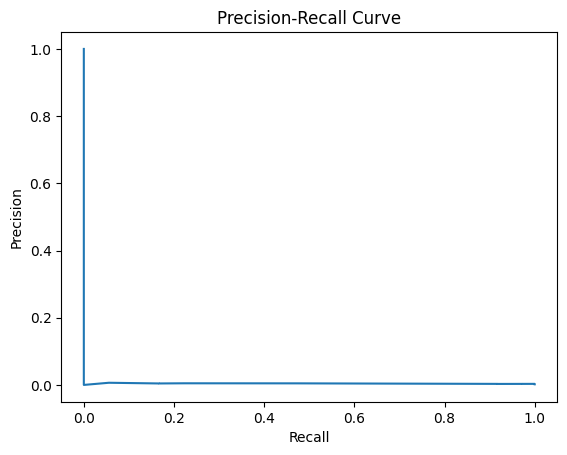

In [6]:
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt
# Example using Random Forest
rf_probs = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, rf_probs)

# Plot Precision-Recall Curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [8]:
import numpy as np
# Find optimal threshold (example: maximizing F1-score)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_threshold = thresholds[np.argmax(f1_scores)]


In [9]:
# Make predictions with adjusted threshold
rf_predictions_adjusted = (rf_probs >= optimal_threshold).astype(int)

# Print classification report
print(classification_report(y_test, rf_predictions_adjusted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19097
           1       0.01      0.06      0.01        36

    accuracy                           0.98     19133
   macro avg       0.50      0.52      0.50     19133
weighted avg       1.00      0.98      0.99     19133



In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Logistic Regression
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression (Baseline):\n", classification_report(y_test, lr_predictions))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest (Baseline):\n", classification_report(y_test, rf_predictions))

# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print("\nXGBoost (Baseline):\n", classification_report(y_test, xgb_predictions))

Logistic Regression (Baseline):
               precision    recall  f1-score   support

           0       1.00      0.40      0.57     19097
           1       0.00      1.00      0.01        36

    accuracy                           0.40     19133
   macro avg       0.50      0.70      0.29     19133
weighted avg       1.00      0.40      0.57     19133


Random Forest (Baseline):
               precision    recall  f1-score   support

           0       1.00      0.39      0.57     19097
           1       0.00      1.00      0.01        36

    accuracy                           0.40     19133
   macro avg       0.50      0.70      0.29     19133
weighted avg       1.00      0.40      0.56     19133


XGBoost (Baseline):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     19097
           1       0.00      1.00      0.00        36

    accuracy                           0.00     19133
   macro avg       0.50      0.50      0.00  

In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Grid Search
lr_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
lr_grid = GridSearchCV(LogisticRegression(random_state=42, solver='liblinear'), lr_params, cv=3, scoring='f1') #scoring is very important.
lr_grid.fit(X_train, y_train)
print("Logistic Regression (Best Params):", lr_grid.best_params_)
lr_best_model = lr_grid.best_estimator_
lr_best_predictions = lr_best_model.predict(X_test)
print("Logistic Regression (Tuned):\n", classification_report(y_test, lr_best_predictions))

# Random Forest Grid Search
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='f1') #scoring is very important.
rf_grid.fit(X_train, y_train)
print("\nRandom Forest (Best Params):", rf_grid.best_params_)
rf_best_model = rf_grid.best_estimator_
rf_best_predictions = rf_best_model.predict(X_test)
print("Random Forest (Tuned):\n", classification_report(y_test, rf_best_predictions))

# XGBoost Grid Search
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb.XGBClassifier(random_state=42), xgb_params, cv=3, scoring='f1')#scoring is very important.
xgb_grid.fit(X_train, y_train)
print("\nXGBoost (Best Params):", xgb_grid.best_params_)
xgb_best_model = xgb_grid.best_estimator_
xgb_best_predictions = xgb_best_model.predict(X_test)
print("XGBoost (Tuned):\n", classification_report(y_test, xgb_best_predictions))